![](TheSparksFoundationLogo.png)

# GRIP @ The Sparks Foundation

## Task2: Prediction using Unsupervised ML

### Author: Renuka Prasad Patwari

### Clustering

Predict the optimum number of clusters and represent it visually.

In [82]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import os
import seaborn as sns

In [83]:
#create a dataframe from csv file

cwd = os.getcwd()

df = pd.read_csv(cwd+"/iris.csv", index_col=0)
print("Data imported successfully")

Data imported successfully


In [84]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 5)

#### The dataset contains 150 Rows and 5 columns

## Checking for null values

In [85]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

#### No null values present in the dataset

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### Finding the unique Species

In [86]:
np.unique(df['Species'])

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

### Corelation between features

<AxesSubplot:>

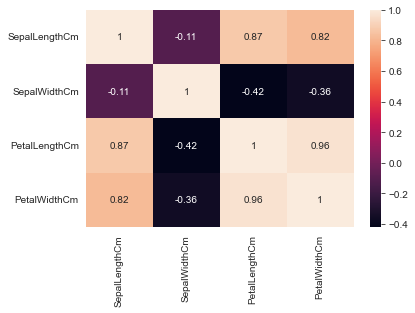

In [88]:
corr = df.corr()
#plt.figure(figsize(10,10))
sns.heatmap(data=corr, annot=True)

### From the above heatmap, we can infer that high corelation exists between the following:
#### 1. Petal Length and Sepal Length 
#### 2. Petal Width and Sepal Length 
#### 3. Petal Width and Petal Length

## Data Visualization

### Scatter Plot

Text(0.5, 1.0, 'Scatter Plot')

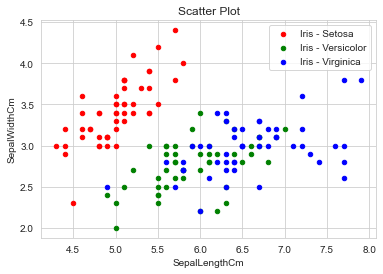

In [89]:
ax = df[df.Species=='Iris-setosa'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                    color='red', label='Iris - Setosa')
df[df.Species=='Iris-versicolor'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='green', label='Iris - Versicolor', ax=ax)
df[df.Species=='Iris-virginica'].plot.scatter(x='SepalLengthCm', y='SepalWidthCm', 
                                                color='blue', label='Iris - Virginica', ax=ax)
ax.set_title("Scatter Plot")

### Box Plot

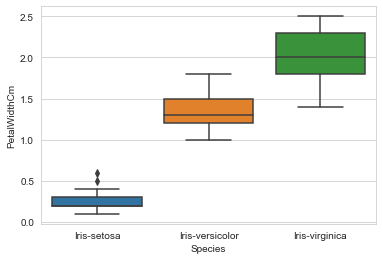

In [90]:
sns.boxplot(x='Species', y='PetalWidthCm', data=df)
plt.show()

## Clustering using K-means

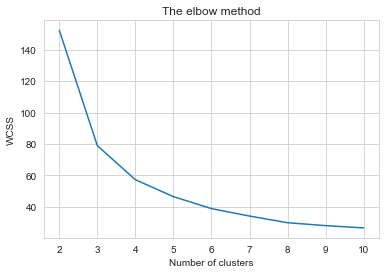

In [91]:
from sklearn.cluster import KMeans
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 5)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(2, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

**The optimum clusters is where the elbow occurs.**<br> This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

From this we choose the number of clusters as **3**.

The **Within-Cluster-Sum-of-Squares (WCSS)** is a measure of the **variability of the observations within each cluster**.<br> In general, a cluster that has a small sum of squares is more compact than a cluster that has a large sum of squares

### Visualization of clusters

In [93]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

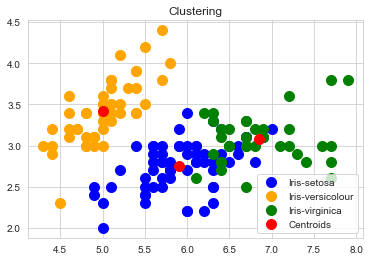

In [94]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.title("Clustering")
plt.legend()

## Thankyou :)